<h1> Final Exam Big Data Analytic <h1>

Name: Dewi Adelia Priyono


NIM: 22/496118/PA/21305

# Creating Session

In [2]:
!pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=74daec18b6be6107a30b4e72f2395f76426d33b4dce8d8e1c4f6f5e07b5e8eea
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [3]:
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder.appName("TransactionAnalysis").getOrCreate()


In [1]:
pip install pandas mlxtend


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Read the Dataset and Calculate Statistics

In [22]:
# Path to the dataset in the Google Drive
file_path = '/content/drive/MyDrive/Big data 2024/mushrooms.txt'

# Read the dataset
with open(file_path, 'r') as file:
    data = [line.strip().split() for line in file.readlines()]

# Preprocessing
# Ensure all transactions are lists of strings
data = [[str(item) for item in transaction] for transaction in data]

# Convert data to a DataFrame
from pyspark.sql import Row

# Create a list of Rows with each transaction length
rows = [Row(transaction_length=len(transaction)) for transaction in data]
df = spark.createDataFrame(rows)

# Calculate statistics
max_length = df.agg({"transaction_length": "max"}).collect()[0][0]
min_length = df.agg({"transaction_length": "min"}).collect()[0][0]
avg_length = df.agg({"transaction_length": "avg"}).collect()[0][0]

print(f"Max Length: {max_length}")
print(f"Min Length: {min_length}")
print(f"Average Length: {avg_length:.2f}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Max Length: 23
Min Length: 23
Average Length: 23.00


# Apply the Apriori Algorithm

# Generating All Frequent Itemset with minsup 70%

In [11]:
import pandas as pd
from mlxtend.frequent_patterns import apriori

# One-hot encode the data
all_items = set(item for transaction in data for item in transaction)
encoded_vals = []

for transaction in data:
    row = {item: (item in transaction) for item in all_items}
    encoded_vals.append(row)

oht_df = pd.DataFrame(encoded_vals)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
# Apply the Apriori algorithm with a minimum support of 70%
frequent_itemsets = apriori(oht_df, min_support=0.7, use_colnames=True)

# Print the frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Count the number of frequent itemsets of different lengths
length_counts = frequent_itemsets['itemsets'].apply(lambda x: len(x)).value_counts().sort_index()
for length, count in length_counts.items():
    print(f"Number of frequent itemsets of length {length}: {count}")

Frequent Itemsets:
     support              itemsets
0   0.810837                  (38)
1   0.923004                  (97)
2   0.974335                  (36)
3   0.976236                  (94)
4   1.000000                  (90)
5   0.768061              (38, 97)
6   0.785171              (38, 36)
7   0.788023              (38, 94)
8   0.810837              (38, 90)
9   0.900190              (36, 97)
10  0.899240              (94, 97)
11  0.923004              (90, 97)
12  0.973384              (94, 36)
13  0.974335              (36, 90)
14  0.976236              (94, 90)
15  0.745247          (36, 38, 97)
16  0.745247          (94, 38, 97)
17  0.768061          (90, 38, 97)
18  0.785171          (36, 38, 94)
19  0.785171          (36, 38, 90)
20  0.788023          (94, 38, 90)
21  0.899240          (36, 94, 97)
22  0.900190          (90, 36, 97)
23  0.899240          (90, 94, 97)
24  0.973384          (36, 94, 90)
25  0.745247      (94, 38, 36, 97)
26  0.745247      (90, 36, 38, 97)
2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Bar chart for number of frequent itemset

In [14]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


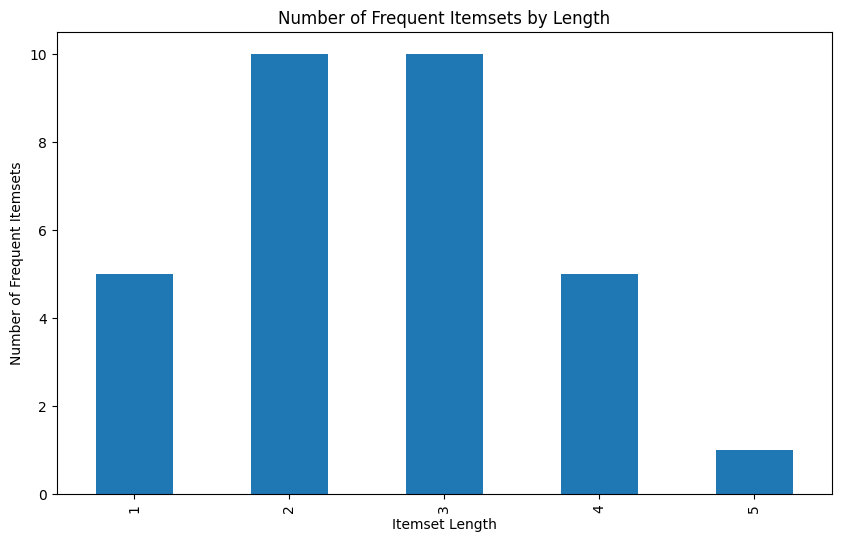

In [15]:
# Count the number of frequent itemsets of different lengths
length_counts = frequent_itemsets['itemsets'].apply(lambda x: len(x)).value_counts().sort_index()

# Visualize the number of frequent itemsets for each length using a bar chart
length_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Itemset Length')
plt.ylabel('Number of Frequent Itemsets')
plt.title('Number of Frequent Itemsets by Length')
plt.show()

# Association rules for minimum confidence value 95% to 100%

In [17]:
from mlxtend.frequent_patterns import apriori, association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
# Define the confidence levels to evaluate
confidence_levels = [0.95, 0.96, 0.97, 0.98, 0.99, 1.0]

# Dictionary to store the number of rules for each confidence level
num_rules = {}

for confidence in confidence_levels:
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)
    num_rules[confidence] = len(rules)
    print(f"Number of association rules with {int(confidence * 100)}% confidence: {num_rules[confidence]}")

Number of association rules with 95% confidence: 69
Number of association rules with 96% confidence: 69
Number of association rules with 97% confidence: 63
Number of association rules with 98% confidence: 39
Number of association rules with 99% confidence: 39
Number of association rules with 100% confidence: 27


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Bar chart for number of association rules by confidence level

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


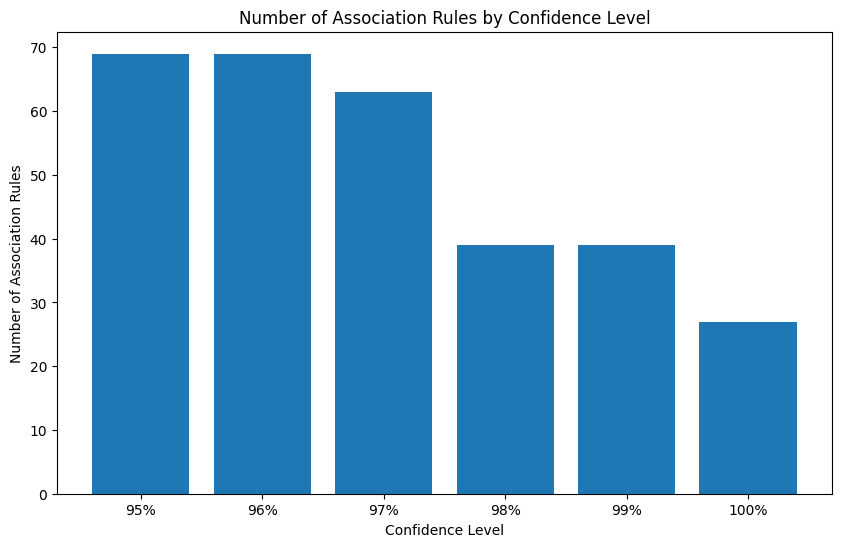

In [20]:
# Plot the number of association rules for each confidence level
plt.figure(figsize=(10, 6))
plt.bar([str(int(conf * 100)) + '%' for conf in confidence_levels], num_rules.values())
plt.xlabel('Confidence Level')
plt.ylabel('Number of Association Rules')
plt.title('Number of Association Rules by Confidence Level')
plt.show()
